In [1]:
# changepoint_detection_updated.py
import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
print(os.listdir("/kaggle/input/bsc-bch-codeword-length31"))

['bsc_p0.010_codewords2.csv', 'bsc_p0.005_codewords1.csv', 'bsc_p0.050_codewords2.csv', 'bsc_p0.010_codewords1.csv', 'bsc_p0.001_codewords1.csv', 'bsc_p0.050_codewords1.csv', 'bsc_p0.001_codewords2.csv', 'bsc_p0.005_codewords2.csv']


## p = 0.001

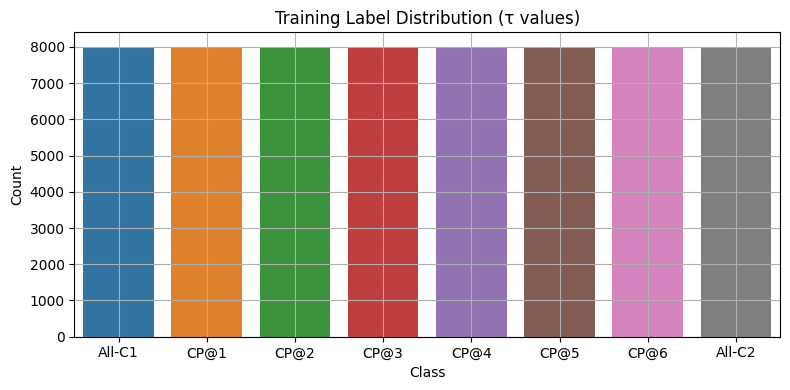

Training Epochs:   2%|▏         | 1/50 [00:07<06:30,  7.97s/it]

Epoch  1 | Train Loss: 2.0856 | Val Accuracy: 0.1284


Training Epochs:   4%|▍         | 2/50 [00:13<05:23,  6.74s/it]

Epoch  2 | Train Loss: 2.0793 | Val Accuracy: 0.1245


Training Epochs:   6%|▌         | 3/50 [00:19<04:56,  6.31s/it]

Epoch  3 | Train Loss: 2.0771 | Val Accuracy: 0.1377


Training Epochs:   8%|▊         | 4/50 [00:25<04:43,  6.16s/it]

Epoch  4 | Train Loss: 2.0731 | Val Accuracy: 0.1409


Training Epochs:  10%|█         | 5/50 [00:31<04:31,  6.03s/it]

Epoch  5 | Train Loss: 1.9911 | Val Accuracy: 0.2911


Training Epochs:  12%|█▏        | 6/50 [00:37<04:22,  5.96s/it]

Epoch  6 | Train Loss: 1.4658 | Val Accuracy: 0.5214


Training Epochs:  14%|█▍        | 7/50 [00:42<04:13,  5.90s/it]

Epoch  7 | Train Loss: 1.1066 | Val Accuracy: 0.6650


Training Epochs:  16%|█▌        | 8/50 [00:48<04:06,  5.87s/it]

Epoch  8 | Train Loss: 0.9063 | Val Accuracy: 0.7619


Training Epochs:  18%|█▊        | 9/50 [00:54<04:02,  5.90s/it]

Epoch  9 | Train Loss: 0.7693 | Val Accuracy: 0.8263


Training Epochs:  20%|██        | 10/50 [01:00<03:54,  5.87s/it]

Epoch 10 | Train Loss: 0.6638 | Val Accuracy: 0.8569


Training Epochs:  22%|██▏       | 11/50 [01:06<03:48,  5.85s/it]

Epoch 11 | Train Loss: 0.5872 | Val Accuracy: 0.8836


Training Epochs:  24%|██▍       | 12/50 [01:12<03:41,  5.84s/it]

Epoch 12 | Train Loss: 0.5144 | Val Accuracy: 0.8983


Training Epochs:  26%|██▌       | 13/50 [01:17<03:34,  5.81s/it]

Epoch 13 | Train Loss: 0.4510 | Val Accuracy: 0.9145


Training Epochs:  28%|██▊       | 14/50 [01:23<03:27,  5.77s/it]

Epoch 14 | Train Loss: 0.4099 | Val Accuracy: 0.9253


Training Epochs:  30%|███       | 15/50 [01:29<03:24,  5.83s/it]

Epoch 15 | Train Loss: 0.3626 | Val Accuracy: 0.9314


Training Epochs:  32%|███▏      | 16/50 [01:35<03:17,  5.81s/it]

Epoch 16 | Train Loss: 0.3387 | Val Accuracy: 0.9378


Training Epochs:  34%|███▍      | 17/50 [01:41<03:11,  5.81s/it]

Epoch 17 | Train Loss: 0.3099 | Val Accuracy: 0.9397


Training Epochs:  36%|███▌      | 18/50 [01:46<03:05,  5.79s/it]

Epoch 18 | Train Loss: 0.2850 | Val Accuracy: 0.9405


Training Epochs:  38%|███▊      | 19/50 [01:52<02:59,  5.80s/it]

Epoch 19 | Train Loss: 0.2699 | Val Accuracy: 0.9436


Training Epochs:  40%|████      | 20/50 [01:58<02:55,  5.85s/it]

Epoch 20 | Train Loss: 0.2506 | Val Accuracy: 0.9459


Training Epochs:  42%|████▏     | 21/50 [02:04<02:49,  5.83s/it]

Epoch 21 | Train Loss: 0.2405 | Val Accuracy: 0.9481


Training Epochs:  44%|████▍     | 22/50 [02:10<02:43,  5.82s/it]

Epoch 22 | Train Loss: 0.2240 | Val Accuracy: 0.9503


Training Epochs:  46%|████▌     | 23/50 [02:15<02:36,  5.80s/it]

Epoch 23 | Train Loss: 0.2156 | Val Accuracy: 0.9520


Training Epochs:  48%|████▊     | 24/50 [02:21<02:30,  5.78s/it]

Epoch 24 | Train Loss: 0.2084 | Val Accuracy: 0.9506


Training Epochs:  50%|█████     | 25/50 [02:27<02:25,  5.81s/it]

Epoch 25 | Train Loss: 0.2022 | Val Accuracy: 0.9550


Training Epochs:  52%|█████▏    | 26/50 [02:33<02:20,  5.84s/it]

Epoch 26 | Train Loss: 0.1961 | Val Accuracy: 0.9541


Training Epochs:  54%|█████▍    | 27/50 [02:39<02:14,  5.85s/it]

Epoch 27 | Train Loss: 0.1880 | Val Accuracy: 0.9537


Training Epochs:  56%|█████▌    | 28/50 [02:45<02:08,  5.85s/it]

Epoch 28 | Train Loss: 0.1820 | Val Accuracy: 0.9547


Training Epochs:  56%|█████▌    | 28/50 [02:51<02:14,  6.11s/it]

Epoch 29 | Train Loss: 0.1785 | Val Accuracy: 0.9558
Early stopping triggered.

Final Test Accuracy: 0.9567



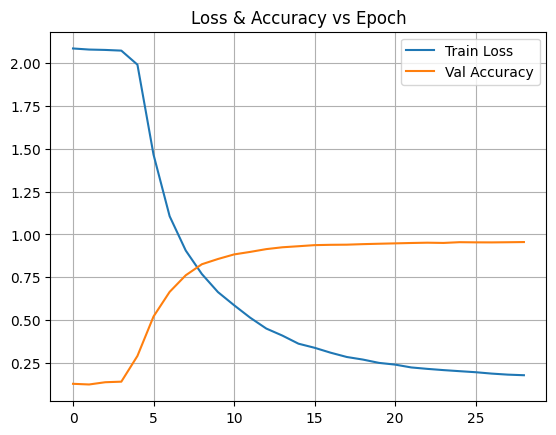

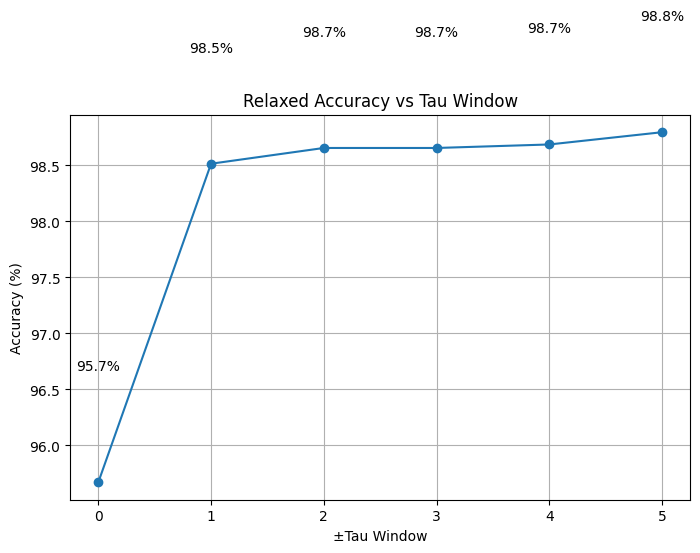

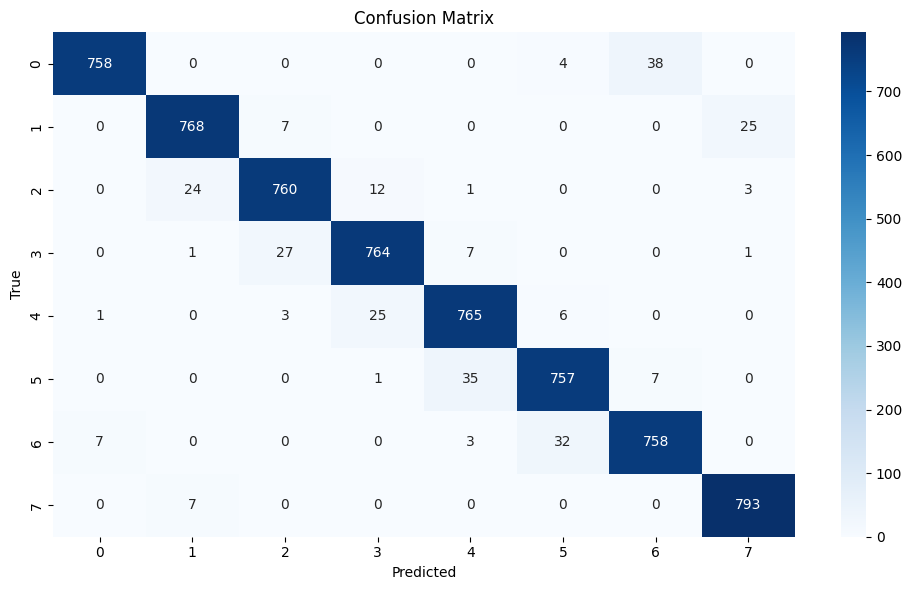

In [3]:
# ========== Configuration ==========
SEED = 0
T = 7
NUM_CLASSES = T + 1
SAMPLES_PER_CLASS_TRAIN = 8000
SAMPLES_PER_CLASS_TEST = int(0.1 * SAMPLES_PER_CLASS_TRAIN)  # 10% of training samples 
BATCH_SIZE = 64
PATIENCE = 4
VAL_DELTA = 0.002
LEARNING_RATE = 1e-4
MAX_EPOCHS = 50

# ========== Set Seeds ==========
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# ========== Load Data ==========
csv1 = pd.read_csv("/kaggle/input/bsc-bch-codeword-length31/bsc_p0.001_codewords1.csv").values
csv2 = pd.read_csv("/kaggle/input/bsc-bch-codeword-length31/bsc_p0.001_codewords2.csv").values
FEATURE_SIZE = csv1.shape[1]

# ========== Updated CPD Dataset Generator ==========
def generate_data_cpd(N_per_class, csv1_data, csv2_data, T):
    Data, Labels = [], []
    for cls in range(NUM_CLASSES):
        for _ in range(N_per_class):
            if cls == 0:
                indices = np.random.choice(len(csv1_data), T)
                sample = csv1_data[indices]
            elif cls == T:
                indices = np.random.choice(len(csv2_data), T)
                sample = csv2_data[indices]
            else:
                tau = cls
                idx1 = np.random.choice(len(csv1_data), tau, replace=True)
                idx2 = np.random.choice(len(csv2_data), T - tau, replace=True)
                sample = np.vstack((csv1_data[idx1], csv2_data[idx2]))
            Data.append(sample)
            Labels.append(cls)
    return np.array(Data), np.array(Labels)

# ========== Create Datasets ==========
# X, y = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN + SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
# X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=SAMPLES_PER_CLASS_TEST * NUM_CLASSES, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, stratify=y_trainval)
X_train, y_train = generate_data_cpd(SAMPLES_PER_CLASS_TRAIN, csv1, csv2, T)
X_val, y_val     = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)
X_test, y_test   = generate_data_cpd(SAMPLES_PER_CLASS_TEST, csv1, csv2, T)



# ========== Plot Label Distribution ==========
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train, palette="tab10")
plt.title("Training Label Distribution (τ values)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(NUM_CLASSES), labels=["All-C1"] + [f"CP@{i}" for i in range(1, T)] + ["All-C2"])
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== Dataset Wrapper ==========
class ChangepointDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ChangepointDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(ChangepointDataset(X_val, y_val), batch_size=BATCH_SIZE)
test_loader = DataLoader(ChangepointDataset(X_test, y_test), batch_size=BATCH_SIZE)

# ========== Model ==========
class ResidualBlock1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, padding=kernel_size // 2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout(dropout)
        self.shortcut = nn.Conv1d(in_channels, out_channels, 1) if in_channels != out_channels else nn.Identity()
        self.bn_sc = nn.BatchNorm1d(out_channels)

    def forward(self, x):
        identity = self.bn_sc(self.shortcut(x))
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.conv2(x))
        return F.relu(x + identity)

class MultiscaleFeatureExtractor(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.branch1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.branch2 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.branch3 = nn.Conv1d(in_channels, out_channels, kernel_size=7, padding=3)
        self.bn = nn.BatchNorm1d(out_channels * 3)

    def forward(self, x):
        x1 = self.branch1(x)
        x2 = self.branch2(x)
        x3 = self.branch3(x)
        x_cat = torch.cat([x1, x2, x3], dim=1)
        return F.relu(self.bn(x_cat))

class CNNChangepointDetector(nn.Module):
    def __init__(self, input_channels, num_classes, input_length):
        super().__init__()
        self.mfe = MultiscaleFeatureExtractor(input_channels, 32)
        if input_length <= 15:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
            )
        else:
            self.res_blocks = nn.Sequential(
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 96),
                ResidualBlock1D(96, 128),
                ResidualBlock1D(128, 128),
            )
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.mfe(x)
        x = self.res_blocks(x)
        x = self.global_avg_pool(x)
        return self.classifier(x)

# ========== Training ==========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNChangepointDetector(input_channels=FEATURE_SIZE, num_classes=NUM_CLASSES, input_length=T).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3)

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_accuracies = [], []

for epoch in trange(MAX_EPOCHS, desc="Training Epochs"):
    model.train()
    running_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb)
            correct += (preds.argmax(1) == yb).sum().item()
            total += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)
    scheduler.step(val_acc)

    print(f"Epoch {epoch+1:2d} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    if val_acc - best_val_acc > VAL_DELTA:
        best_val_acc = val_acc
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= PATIENCE:
            print("Early stopping triggered.")
            break

# ========== Evaluation ==========
model.load_state_dict(best_model_state)
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        all_preds.extend(preds.argmax(1).cpu().numpy())
        all_targets.extend(yb.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)
strict_acc = accuracy_score(all_targets, all_preds)
print(f"\nFinal Test Accuracy: {strict_acc:.4f}\n")

# ========== Relaxed Accuracy ==========
def relaxed_accuracy(y_true, y_pred, window):
    return np.mean(np.abs(y_true - y_pred) <= window)

wins = list(range(6))
relaxed_accs = [relaxed_accuracy(all_targets, all_preds, w) * 100 for w in wins]

plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accuracies, label="Val Accuracy")
plt.legend()
plt.title("Loss & Accuracy vs Epoch")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(wins, relaxed_accs, marker='o')
for x, y in zip(wins, relaxed_accs):
    plt.text(x, y + 1, f"{y:.1f}%", ha='center')
plt.title("Relaxed Accuracy vs Tau Window")
plt.xlabel("\u00b1Tau Window")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

conf_mat = confusion_matrix(all_targets, all_preds, labels=np.arange(NUM_CLASSES))
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


***T = 7, p = 0.001, CL = 31, del_window ∈ [1,5], 50 Epochs(if early stopping not triggered)***  </br>
<pre>
For N'(training samples/class) = 1000     Accuracy = 
For N'(training samples/class) = 2000     Accuracy =  
For N'(training samples/class) = 3000     Accuracy = 
For N'(training samples/class) = 4000     Accuracy = 
For N'(training samples/class) = 5000     Accuracy = 13.9, 34.3, 50.9, 65.1, 77.7, 87.9
For N'(training samples/class) = 6000     Accuracy = 
For N'(training samples/class) = 7000     Accuracy = 
For N'(training samples/class) = 8000     Accuracy = 
For N'(training samples/class) = 10000     Accuracy = 
For N'(training samples/class) = 11000     Accuracy = 
For N'(training samples/class) = 12000     Accuracy = 
For N'(training samples/class) = 15000     Accuracy = 
For N'(training samples/class) = 20000     Accuracy = 
</pre>

## p = 0.005

## p = 0.01

## p = 0.05